## Iteration 3 R2: Linear Regression model



y = c + mx

We will do linear regression in four steps.
- Create x and y
- Create Train and Test set
- Train the model
- Evaluate the model

We want to predict the Average duration of a Bowel sound from the Bowel sound rate.

Hence, our x is bowel sound rate, and y is Average duration of a Bowel sound.

In [ ]:
# Creating X and y
x = df['bowelSounds/min']
y = df['Avg duration']

In [ ]:
# Splitting the variables as training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
x_train

32     4.71
6      6.17
3     19.93
12     3.77
51    12.50
      ...  
79    11.84
87    47.62
67     5.79
24    17.60
8     34.80
Name: bowelSounds/min, Length: 70, dtype: float64

In [ ]:
y_train

32    7.35
6     5.86
3     3.01
12    7.90
51    2.04
      ... 
79    3.44
87    1.26
67    4.54
24    1.66
8     1.01
Name: Avg duration, Length: 70, dtype: float64

In [ ]:
# import statsmodel for linear regression
import statsmodels.api as sm

# Adding a constant to get an intercept
x_train_sm = sm.add_constant(x_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Fitting the regression line using 'OLS'
lr = sm.OLS(y_train, x_train_sm).fit()

# Parameters
lr.params

const              7.605524
bowelSounds/min   -0.208048
dtype: float64

In [ ]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Avg duration   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     49.71
Date:                Mon, 16 May 2022   Prob (F-statistic):           1.15e-09
Time:                        14:52:04   Log-Likelihood:                -162.02
No. Observations:                  70   AIC:                             328.0
Df Residuals:                      68   BIC:                             332.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.6055      0.451     16.851      0.000       6.705       8.506
bowelSounds/min    -0.2080      0.030     -7.051      0.000      -0.267      -0.149
==============================================================================
Omnibus:                       32.023   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.966
Skew:                           1.604   Prob(JB):                     1.29e-14
Kurtosis:                       6.413   Cond. No.                         23.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Points to note:

1.   The coefficient for Bowel Sounds per min is -0.2080, and its corresponding p-value is very low, almost zero. That means the coefficient is statistically significant.
2.   R-squared value is 0.422, which means that 42.2% of the 'Average duration of a Bowel Sound' variance can be explained by the 'Bowel Sounds per min' column using this line.
3. Prob (F-statistic) has a very low p-value, almost zero, which gives us that the model is statistically significant.


Average duration of a Bowel Sound = 7.6055 + (-0.2080) * Bowel Sounds per min

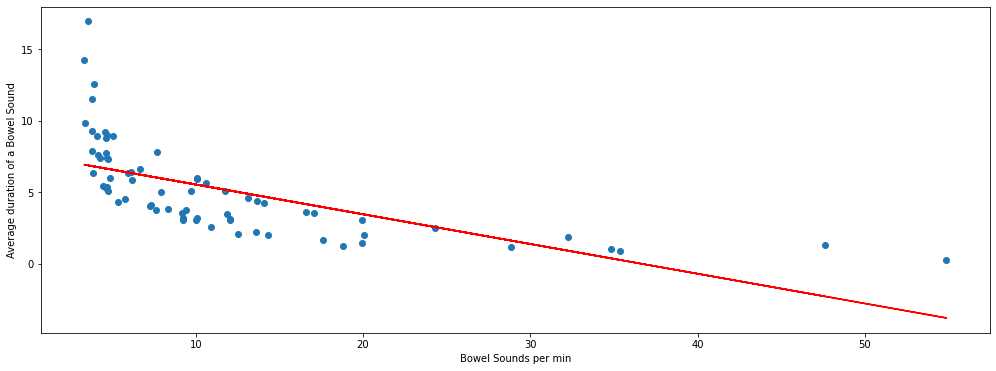

In [ ]:
# Visualizing the regression line
plt.scatter(x_train, y_train)
plt.gcf().set_size_inches((17, 6)) 
plt.plot(x_train, 7.6055 + (-0.2080) * x_train, 'r')
plt.xlabel("Bowel Sounds per min") #x label
plt.ylabel("Average duration of a Bowel Sound") #y label
plt.show()

Evaluating the model using Residual Analysis:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


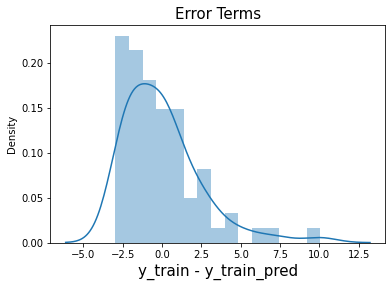

In [ ]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(x_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

# histogram plot of residual
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

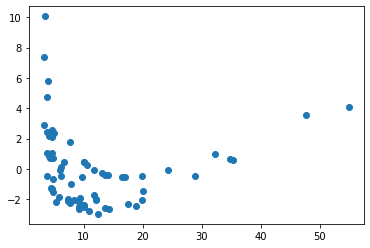

In [ ]:
# scatter plot of residual
plt.scatter(x_train,res)
plt.show()

From the above histogram and scatter plots, we can see that the residuals are not normally distributed.

Hence, although the model can explain some trends in the dataset, this linear regression model does not explain all trends in the dataset.